In [1]:
from keras.datasets import reuters

In [4]:
(trainData, trainLabels),(testData, testLabels)=reuters.load_data(num_words=10000) #가장많이등장한 1만개의 단어

In [5]:
print(len(trainData))
print(len(testData))

8982
2246


In [7]:
trainData[10]
trainLabels[10] #3번 카테고리

3

In [13]:
word_index=reuters.get_word_index()
reverseWordIndex=dict([(value, key) for (key, value) in word_index.items()])
# reverseWordIndex

In [14]:
decodedNews=" ".join([reverseWordIndex.get(i-3,'?') for i in trainData[0]]) #인덱스가 존재하지 않으면 ? 로 대체

In [15]:
decodedNews

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [44]:
#데이터를 벡터로 변환
def vec_seq(seq, dimension=10000):
    res=np.zeros((len(seq), dimension)) # (8982, 10000)
    # print(res, res.shape) # 지금 다 0으로 들어간 상태
    # trainData[i]의 단어인덱스 ->해당하면 1로 바꿔줌. 
    for i, sequence in enumerate(seq):
        # print(i, sequence) # i = 문서의 번호 
        res[i, sequence]=1
    return res
xTrain = vec_seq(trainData)
xTest = vec_seq(testData)


In [20]:
xTrain

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [22]:
#레이블 -> 벡터로 변환 (원핫 인코딩)
def toOneHot(labels, dimension=46):
    res =np.zeros((len(labels), dimension)) #8982,46
    for i, label in enumerate(labels):
        res[i, label]=1
    return res
OneHotTrainLabels= toOneHot(trainLabels)
OneHotTestLabels= toOneHot(testLabels)

In [24]:
OneHotTrainLabels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
trainLabels.shape

(8982,)

In [ ]:
#원핫인코딩 내장함수를 이용한 변환
from keras.utils.np_utils import to_categorical
to_categorical(trainLabels)


In [26]:
from keras import models,layers

In [40]:
%matplotlib inline

In [37]:
xval = xTrain[:1000] #검증셋
pxTrain = xTrain[1000:] #트래이닝셋
yval = OneHotTrainLabels[:1000] #검증셋
pyTrain = OneHotTrainLabels[1000:] #트래이닝셋


In [46]:
pxTrain.shape

(7982, 10000)

히든 계층의 퍼세트론(노드, 유닛)의 개수가 너무 작으면 오히려 데이ㅓㅌ에 대한 손실이 발생->정확도가 줄어듦  
적절히 조절하면 데이터를 압춛ㄱ해서 노이즈가 줄어드는 효과를 얻을 수 있음   
반대로 퍼셉트론의 개수를 데이터보다 크게 줄수고있음, 이런경우에는 레이블을 표현하기 위한 더 ㅁ낳ㅇ느 정보를 ㄹ담을 수 있어 정확도를 올릴수도 있다



In [45]:
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(pxTrain,pyTrain, epochs= 5, batch_size=512, validation_data=(xval, yval))

result =model.evaluate(xTest, OneHotTestLabels)
print(result)

Epoch 1/5
16/16 [==============================] - 1s 52ms/step - loss: 2.1487 - accuracy: 0.5425 - val_loss: 1.3913 - val_accuracy: 0.6910
Epoch 2/5
16/16 [==============================] - 1s 51ms/step - loss: 1.1320 - accuracy: 0.7380 - val_loss: 1.1163 - val_accuracy: 0.7660
Epoch 3/5
16/16 [==============================] - 1s 47ms/step - loss: 0.7527 - accuracy: 0.8344 - val_loss: 0.9761 - val_accuracy: 0.7920
Epoch 4/5
16/16 [==============================] - 1s 45ms/step - loss: 0.5295 - accuracy: 0.8834 - val_loss: 0.9226 - val_accuracy: 0.8090
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 1.0303 - accuracy: 0.7832
[1.0303354263305664, 0.7831701040267944]


In [49]:
predictions=model.predict(xTest)
np.sum(predictions[0])
np.max(predictions[0])

0.9431127

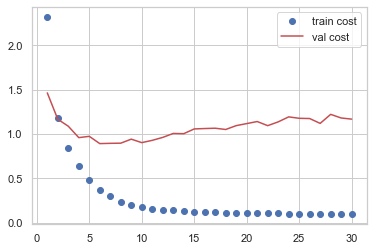

In [41]:
histDict=history.history
histDict.keys()
history.history['loss']
import matplotlib.pyplot as plt 
plt.plot(range(1, len(history.history['accuracy'])+1), history.history['loss'],'bo', label='train cost') # 1~30
plt.plot(range(1, len(history.history['accuracy'])+1), history.history['val_loss'],'r', label='val cost') # 1~30
plt.legend()